In [3]:
import time
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

- 쇼 생크 탈출(1994)

In [4]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [5]:
#제목을 가져옴
divs = soup.select('.lister-item-content')
len(divs)

25

In [6]:
# 밑으로 내려가기
driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
time.sleep(5) 

In [16]:
# 답변 목록에서 개별 답변을 선택하고, 글을 추출하기
div =divs[0]
title =div.select_one('.title').get_text()
name=div.select_one('.text.show-more__control').get_text()
star =div.select_one('.rating-other-user-rating > span').get_text().strip()

1


In [8]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
for _ in range(39):
    driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
    time.sleep(5)
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs = soup.select('.lister-item-content')
lins = []
div =divs[0]
for div in divs:    
    title =div.select_one('.title').get_text()
    name=div.select_one('.text.show-more__control').get_text()
    try:
        star =div.select_one('.rating-other-user-rating > span').get_text().strip()
    except:
        star=np.nan             # 결측치를 만들면 평균을 구할수있음
    # if star == None:
    #     continue
    lins.append({'title':title,'name':name,'star':star})

In [18]:
### 비추천
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
for _ in range(1):
    driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
    time.sleep(5)
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs = soup.select('.lister-item-content')
lins = []
div =divs[0]
for div in divs:    
    title =div.select_one('.title').get_text()
    name=div.select_one('.text.show-more__control').get_text()

    # select 은 리스트로 만들어 주는거여서 [0]번째가 없으면 
    star =div.select('.rating-other-user-rating > span')
    if len(star) !=0:
        star[0].get_text()
    lins.append({'title':title,'name':name,'star':star})

In [20]:
df=pd.DataFrame(lins)
df.head(15)

,title,name,star
0,Some birds aren't meant to be caged.\n,The Shawshank Redemption is written and direct...,"[[10], [/10]]"
1,An incredible movie. One that lives with you.\n,It is no wonder that the film has such a high ...,"[[10], [/10]]"
2,Don't Rent Shawshank.\n,I'm trying to save you money; this is the last...,"[[10], [/10]]"
3,This is How Movies Should Be Made\n,This movie is not your ordinary Hollywood flic...,"[[10], [/10]]"
4,A classic piece of unforgettable film-making.\n,"In its Oscar year, Shawshank Redemption (writt...","[[10], [/10]]"
5,The Shawshank Redemption\n,One of the finest films made in recent years. ...,"[[10], [/10]]"
6,"Enthralling, fantastic, intriguing, truly rem...",Shawshank Redemption is without doubt one of t...,"[[10], [/10]]"
7,Stephen King's best adapted movie\n,Misery and Stand By Me were the best adaptatio...,"[[10], [/10]]"
8,Eternal Hope\n,I've lost count of the number of times I have ...,"[[10], [/10]]"
9,IMDb and the Greatest Film of All Time\n,Two imprisoned men (Tim Robbins and Morgan Fre...,"[[10], [/10]]"


In [10]:
df.to_csv('data/IMDM.txt',index=False)

In [11]:
with open('data/IMDM.txt')as f:
    text =f.read()

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

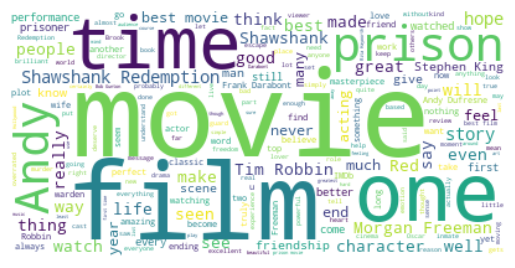

In [13]:
sw_wc =STOPWORDS
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
    ).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()